In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score

In [2]:
# Load data
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv(path)

In [4]:
# Define the filters data only for Canada location
condition1 = 'North America' 
condition2 = 'Canada'
# Filter the data
df1 = df.loc[(df['Continent'] == condition1) & (df['Location'] == condition2)]

**Without Average**

In [5]:
# time series
df2 = df1.copy()
df2["Date"] = pd.to_datetime(df2["Date"])
df2= df2.set_index("Date")

In [89]:
# subtract 7 records as in USA there are less rows
#df1 = df1[:int(len(df1)-25)]
df2= df2.dropna()
#X=df1.drop(['Date','New cases smoothed','Continent','Location','tests units'], axis=1)
X_Canada=df2.drop(['New Cases','New cases smoothed','people fully vaccinated per hundred','new people vaccinated smoothed per hundred','new tests smoothed per thousand','total cases per million','total vaccinations per hundred','people vaccinated per hundred','total deaths per million','new vaccinations smoothed per million','hosp patients per million','New Cases','new cases per million','Continent','Location','tests units','total boosters per hundred','weekly hosp admissions','weekly icu admissions','population','population density','median age','aged 65 older','aged 70 older','extreme poverty','cardiovasc death rate','diabetes prevalence','female smokers','male smokers','hospital beds per thousand','life expectancy'], axis=1)
#X=X.iloc[:-19931]
#X_Canada=X_Canada[:int(len(X_Canada)-18)]
X_Canada.shape

(773, 21)

#**Exponential Smoothing**

In [7]:
X_Canada=X_Canada.drop(['Date'],axis=1)
def exponential_smoothing(X_Canada, alpha):
   
    # Convert data to a Pandas Series
    if isinstance(X_Canada, pd.DataFrame):
        data = X_Canada.iloc[:, 0]
    data = pd.Series(data)

    # Convert alpha to a float
    alpha = float(alpha)

    # Apply exponential smoothing
    smoothed_data = pd.Series(np.zeros(len(data)), index=data.index)
    smoothed_data.iloc[0] = data.iloc[0]
    for i in range(1, len(data)):
        smoothed_data.iloc[i] = alpha * data.iloc[i] + (1 - alpha) * smoothed_data.iloc[i-1]

    return smoothed_data


KeyError: ignored

In [ ]:
alpha = 0.5
smoothed_data = exponential_smoothing(X_Canada, alpha)
print(smoothed_data)

In [90]:
y_Canada = df1['New Cases']
y_Canada.shape

(773,)

In [91]:
#Splitting the dataset into train and testing
from sklearn.model_selection import train_test_split
X_train_CAN,X_test_CAN, y_train_CAN, y_test_CAN = train_test_split(X_Canada,y_Canada,test_size=0.20)
print(X_train_CAN.shape, X_test_CAN.shape,y_train_CAN.shape,y_test_CAN.shape)

(618, 21) (155, 21) (618,) (155,)


In [92]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [93]:
#fit the Canada Train model
fit_model = model.fit(X_train_CAN, y_train_CAN)

#**prediction on the training data**

In [94]:
#prediction  on the training dataset
y_train_pred_Canada = fit_model.predict(X_train_CAN)

In [95]:
print('The r_sq is: %.2f'% r2_score(y_train_CAN, y_train_pred_Canada))
print('The MAE is: %.2f' % mean_absolute_error(y_train_CAN,y_train_pred_Canada))
print('The MSE is: %.2f' % mean_squared_error(y_train_CAN,y_train_pred_Canada))
print('The RMSE  is: %.2f' % np.sqrt(mean_squared_error(y_train_CAN,y_train_pred_Canada)))
print('The EVS  is: %.2f' % np.sqrt(explained_variance_score(y_train_CAN,y_train_pred_Canada)))

The r_sq is: 0.98
The MAE is: 314.10
The MSE is: 904818.33
The RMSE  is: 951.22
The EVS  is: 0.99


#**prediction  on the testing dataset**

In [96]:
y_test_pred_Canada = fit_model.predict(X_test_CAN)

In [97]:
print('The r_sq is: %.2f'% r2_score(y_test_CAN, y_test_pred_Canada))
print('The MAE is: %.2f'% mean_absolute_error(y_test_CAN, y_test_pred_Canada))
print('The MSE is: %.2f'% mean_squared_error(y_test_CAN, y_test_pred_Canada))
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test_CAN, y_test_pred_Canada)))
print('The EVS is: %.2f'% explained_variance_score(y_test_CAN, y_test_pred_Canada))

The r_sq is: 0.86
The MAE is: 661.14
The MSE is: 2937485.82
The RMSE is: 1713.91
The EVS is: 0.86


#**Training and Testing Score**

In [98]:
print("Trainig Score:", fit_model.score(X_train_CAN, y_train_CAN))
print("Testing Score:", fit_model.score(X_test_CAN , y_test_CAN))

Trainig Score: 0.9835218366533924
Testing Score: 0.8555999442289148


#**Accuracy for Canada Prediction**

In [99]:
print("Accuracy =", r2_score(y_test_CAN, y_test_pred_Canada))

Accuracy = 0.8555999442289148


#**Plot Observed vs Predicted value of Canada**

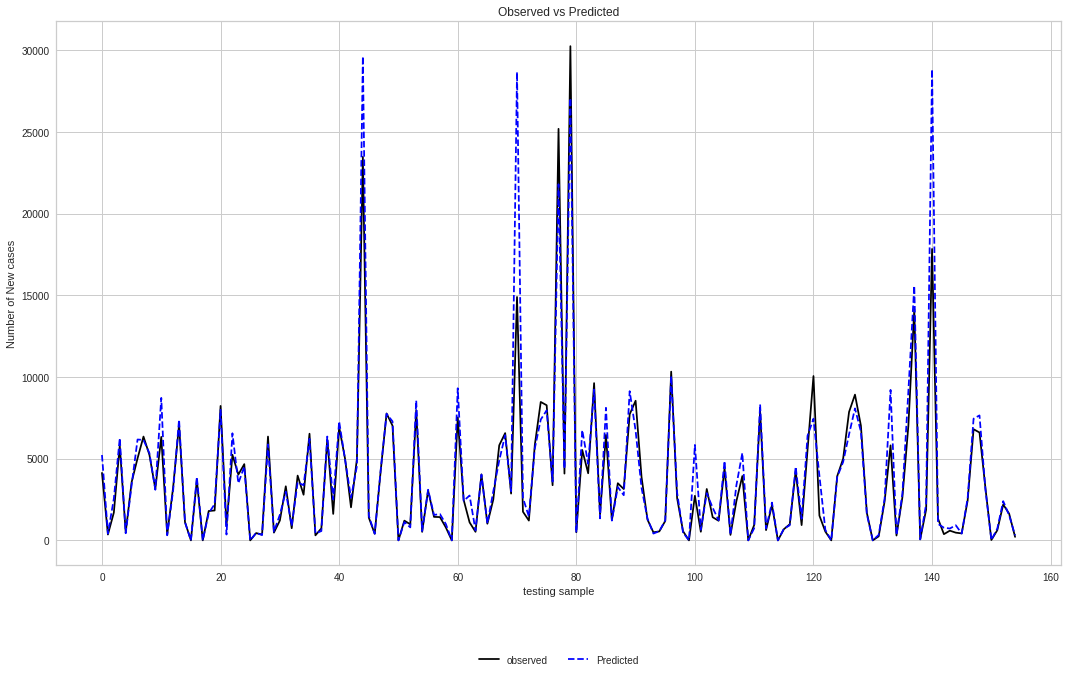

In [100]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18,10]
x_ax=range(len(X_test_CAN))

#plot
plt.plot(x_ax,y_test_CAN, label='observed',color='black', linestyle='-')
plt.plot(x_ax,y_test_pred_Canada, label='Predicted',color='blue' ,linestyle='--')
plt.ylabel('Number of New cases')
plt.xlabel('testing sample')
plt.title("Observed vs Predicted")
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol=2, frameon = False)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


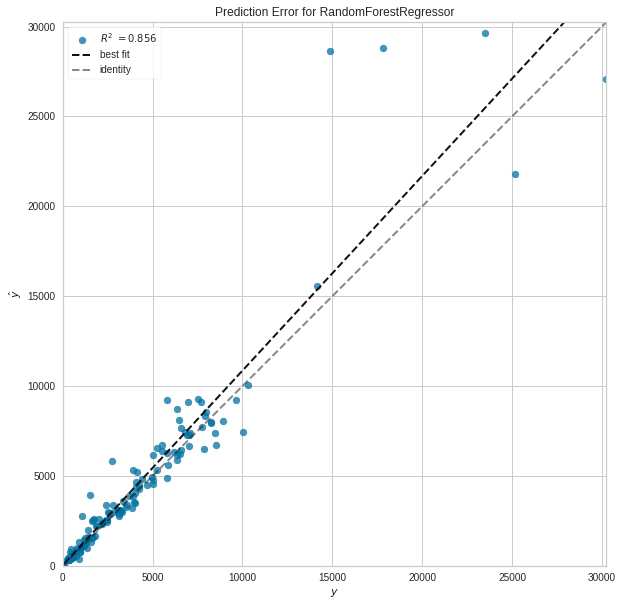

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [101]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(fit_model)
visualizer.fit(X_train_CAN, y_train_CAN)
visualizer.score(X_test_CAN,y_test_CAN)
visualizer.poof()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


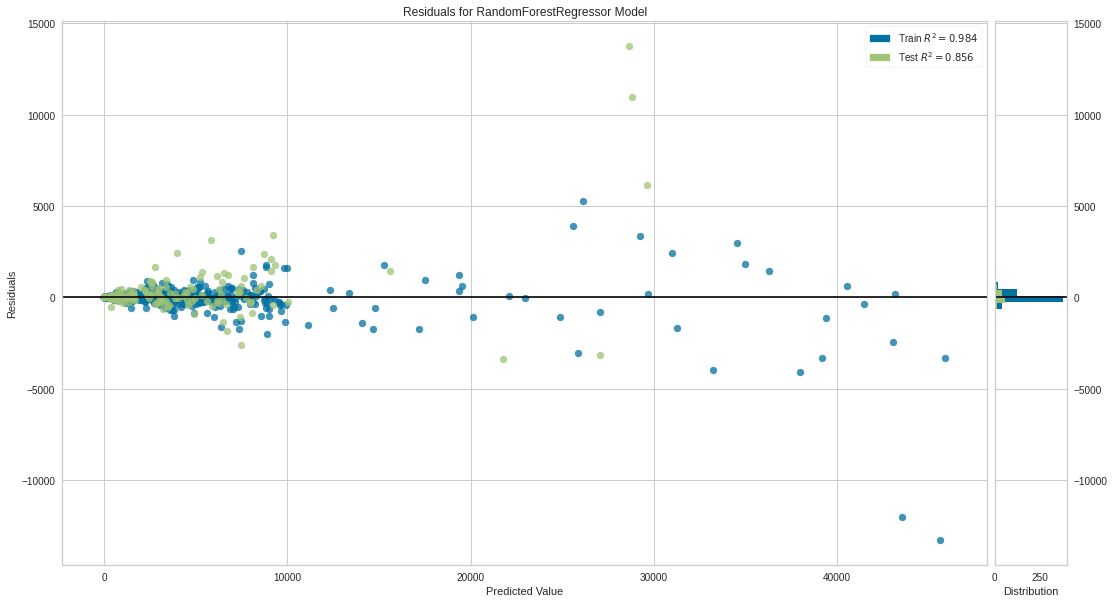

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [102]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(fit_model)
visualizer.fit(X_train_CAN, y_train_CAN)
visualizer.score(X_test_CAN,y_test_CAN)
visualizer.poof()

#**Cross validation score**

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Generate some example data
X = X_train_CAN
y = y_train_CAN

# Define the number of folds
k = 2

# Define the model to be used
model = RandomForestRegressor(n_estimators=100)

# Define the cross-validation method
kf = KFold(n_splits=k)

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)


Cross-validation scores: [0.87579477 0.90594403]


#**Important features**

In [104]:
#!pip install --upgrade scikit-learn
from sklearn.pipeline import Pipeline
#!pip install sklearn


f_list=list(X_Canada.columns)
f_importance = pd.Series(fit_model.feature_importances_, index=f_list).sort_values(ascending= False)
print(f_importance)

positive rate                     0.535942
new tests smoothed                0.251516
hosp patients                     0.036285
new vaccinations                  0.035659
Total Cases                       0.016878
people vaccinated                 0.015461
New deaths                        0.014391
people fully vaccinated           0.013168
total boosters                    0.009673
total vaccinations                0.008372
total tests                       0.007801
reproduction rate                 0.007731
new tests                         0.007596
new tests per thousand            0.007066
Total deaths                      0.006988
icu patients                      0.006895
tests per case                    0.006304
new vaccinations smoothed         0.004933
new people vaccinated smoothed    0.003689
new deaths smoothed               0.003351
stringency index                  0.000299
dtype: float64


#**Using Average Mean Part Begins**

In [105]:
# subtract 7 records as in USA there are less rows
#df1 = df1[:int(len(df1)-25)]
df1= df1.dropna()
#X=df1.drop(['Date','New cases smoothed','Continent','Location','tests units'], axis=1)
X_Canada=df1.drop(['New Cases','New cases smoothed','people fully vaccinated per hundred','new people vaccinated smoothed per hundred','new tests smoothed per thousand','total cases per million','total vaccinations per hundred','people vaccinated per hundred','total deaths per million','new vaccinations smoothed per million','hosp patients per million','New Cases','new cases per million','Continent','Location','tests units','total boosters per hundred','weekly hosp admissions','weekly icu admissions','population','population density','median age','aged 65 older','aged 70 older','extreme poverty','cardiovasc death rate','diabetes prevalence','female smokers','male smokers','hospital beds per thousand','life expectancy'], axis=1)
#X=X.iloc[:-19931]
#X_Canada=X_Canada[:int(len(X_Canada)-18)]
X_Canada.shape

(773, 22)

**Average Mean of X**

In [106]:
X_Canada_Avg_mean=X_Canada.copy()
X_Canada_Avg_mean.date = pd.to_datetime(X_Canada_Avg_mean['Date'])
#X_Canada_Avg_mean = X_Canada_Avg_mean.groupby('Date').sum()
X_Canada_Avg_mean = X_Canada.groupby('Date').sum()
#X_Canada_Avg_mean['7 days Train']  = 0
X_Canada_Avg_mean = X_Canada.rolling(7).mean()
X_Canada_Avg_mean = X_Canada_Avg_mean.dropna()
#X_Canada_Avg_mean = X_Canada_Avg_mean[:int(len(X_Canada_Avg_mean)-9)]
X_Canada_Avg_mean.shape

<ipython-input-106-f7e7908d8399>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_Canada_Avg_mean.date = pd.to_datetime(X_Canada_Avg_mean['Date'])


(767, 21)

**Average of y**

In [107]:
y_Canada_Avg_mean = df1['New Cases'].rolling(7).mean()
#y_Canada_Avg_mean = y_Canada_Avg_mean[:int(len(y_Canada_Avg_mean))]
y_Canada_Avg_mean = y_Canada_Avg_mean.dropna()
#y_Canada_Avg_mean = y_Canada_Avg_mean[:int(len(y_Canada_Avg_mean)-9)]
y_Canada_Avg_mean.shape

(767,)

In [108]:
data2=df1.copy()
data2.date = pd.to_datetime(data2['Date'])
data2 = data2.groupby('Date').sum()
data2['7 days MA new cases'] = 0
data2['7 days MA new cases'] = data2['New Cases'].rolling(10).mean()
data2['7 days MA new cases'].dropna()


<ipython-input-108-ef61d5cd1ab1>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data2.date = pd.to_datetime(data2['Date'])


Date
2020-02-01       0.4
2020-02-02       0.2
2020-02-03       0.1
2020-02-04       0.2
2020-02-05       0.3
               ...  
2022-03-01    5666.6
2022-03-02    6062.1
2022-03-03    6439.2
2022-03-04    6664.7
2022-03-05    5931.7
Name: 7 days MA new cases, Length: 764, dtype: float64

Text(0, 0.5, 'New cases')

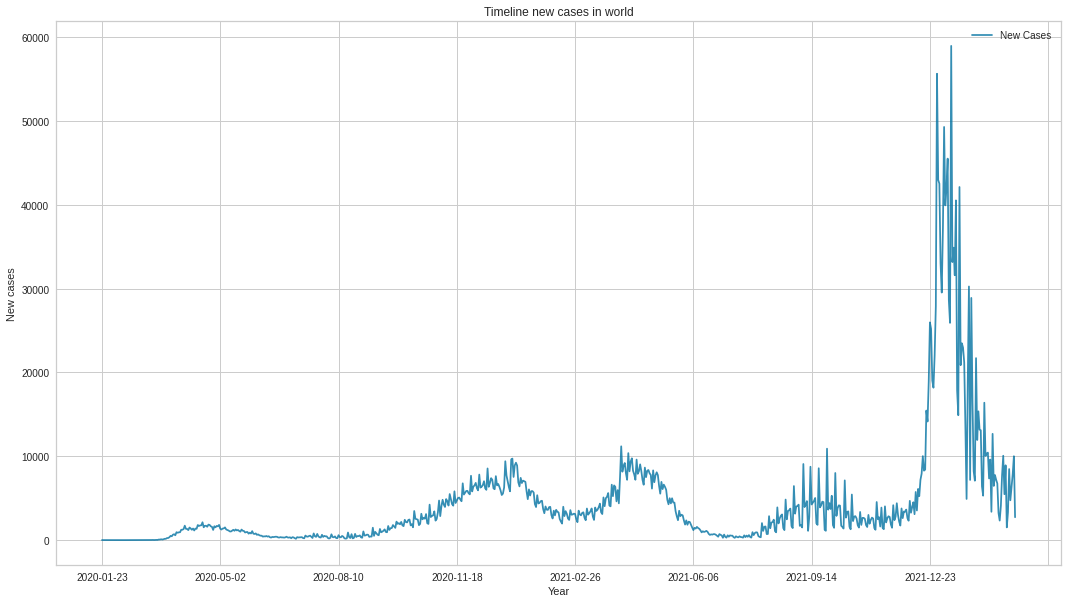

In [109]:

data2[['New Cases']].plot(figsize = (18, 10), alpha = 0.8)
plt.title('Timeline new cases in world')
plt.xlabel('Year')
plt.ylabel('New cases')

Text(0, 0.5, 'New cases')

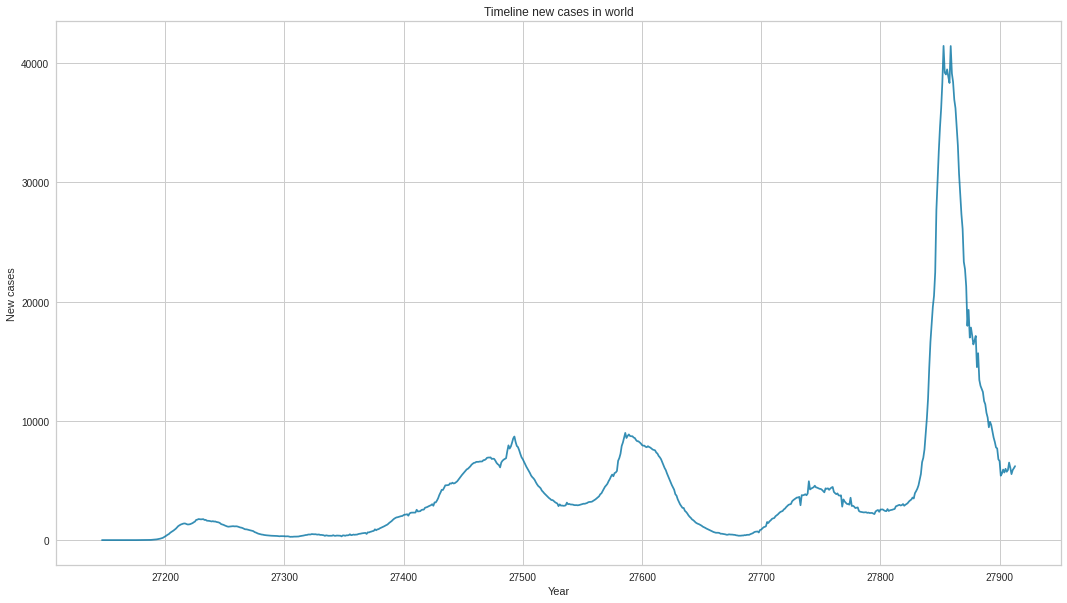

In [110]:
y_Canada_Avg_mean.plot(figsize = (18, 10), alpha = 0.8)
plt.title('Timeline new cases in world')
plt.xlabel('Year')
plt.ylabel('New cases')

Text(0, 0.5, 'New cases')

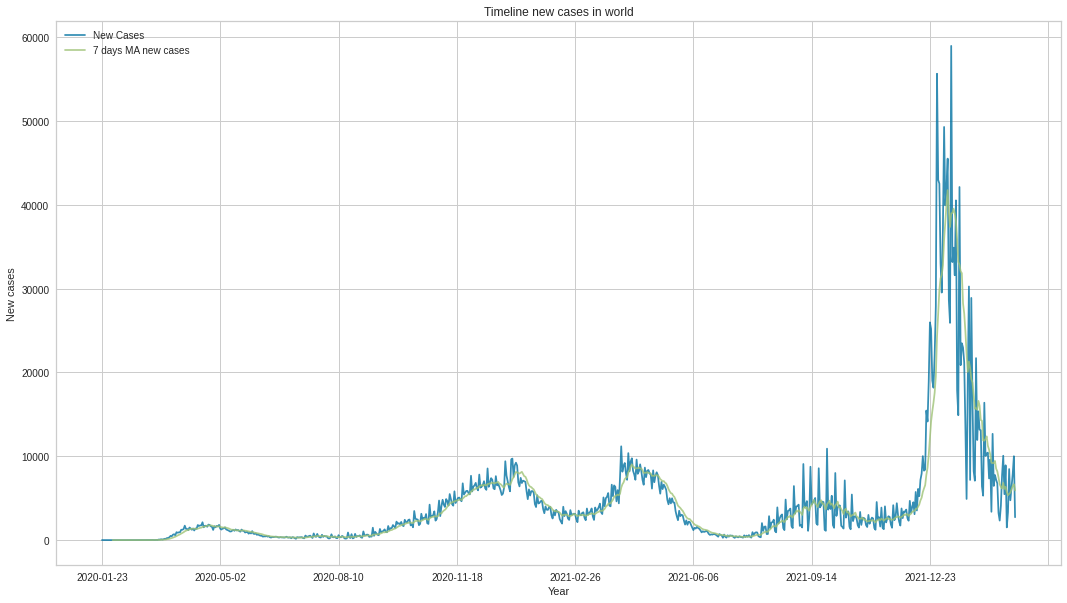

In [111]:
data2[['New Cases', '7 days MA new cases']].plot(figsize = (18, 10), alpha = 0.8)
plt.title('Timeline new cases in world')
plt.xlabel('Year')
plt.ylabel('New cases')


In [112]:
#Splitting the dataset into train and testing Average mean of Test and Train
from sklearn.model_selection import train_test_split
X_train_CAN_avg,X_test_CAN_avg, y_train_CAN_avg, y_test_CAN_avg = train_test_split(X_Canada_Avg_mean,y_Canada_Avg_mean,test_size=0.20)
print(X_train_CAN_avg.shape, X_test_CAN_avg.shape,y_train_CAN_avg.shape,y_test_CAN_avg.shape)

(613, 21) (154, 21) (613,) (154,)


In [113]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [114]:
#fit the Canada Train model
fit_model = model.fit(X_train_CAN_avg, y_train_CAN_avg)

In [115]:
#prediction  on the training dataset
y_train_pred_Canada_avg = fit_model.predict(X_train_CAN_avg)

In [116]:
print('The r_sq is: %.2f'% r2_score(y_train_CAN_avg, y_train_pred_Canada_avg))
print('The MAE is: %.2f' % mean_absolute_error(y_train_CAN_avg,y_train_pred_Canada_avg))
print('The MSE is: %.2f' % mean_squared_error(y_train_CAN_avg,y_train_pred_Canada_avg))
print('The RMSE  is: %.2f' % np.sqrt(mean_squared_error(y_train_CAN_avg,y_train_pred_Canada_avg)))
print('The EVS  is: %.2f' % np.sqrt(explained_variance_score(y_train_CAN_avg,y_train_pred_Canada_avg)))

The r_sq is: 1.00
The MAE is: 76.48
The MSE is: 153375.68
The RMSE  is: 391.63
The EVS  is: 1.00


**Prediction on Testing Test Avg**

In [117]:
y_test_pred_Canada_avg = fit_model.predict(X_test_CAN_avg)

In [118]:
print('The r_sq is: %.2f'% r2_score(y_test_CAN_avg, y_test_pred_Canada_avg))
print('The MAE is: %.2f'% mean_absolute_error(y_test_CAN_avg, y_test_pred_Canada_avg))
print('The MSE is: %.2f'% mean_squared_error(y_test_CAN_avg, y_test_pred_Canada_avg))
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test_CAN_avg, y_test_pred_Canada_avg)))
print('The EVS is: %.2f'% explained_variance_score(y_test_CAN_avg, y_test_pred_Canada_avg))

The r_sq is: 0.98
The MAE is: 227.55
The MSE is: 970421.57
The RMSE is: 985.10
The EVS is: 0.98


In [119]:
print("Trainig Score:", fit_model.score(X_train_CAN_avg, y_train_CAN_avg))
print("Testing Score:", fit_model.score(X_test_CAN_avg , y_test_CAN_avg))

Trainig Score: 0.9963833807399375
Testing Score: 0.9777103950988554


In [120]:
print("Accuracy =", r2_score(y_test_CAN_avg, y_test_pred_Canada_avg))

Accuracy = 0.9777103950988554


Text(0.5, 1.0, 'Observed vs Predicted')

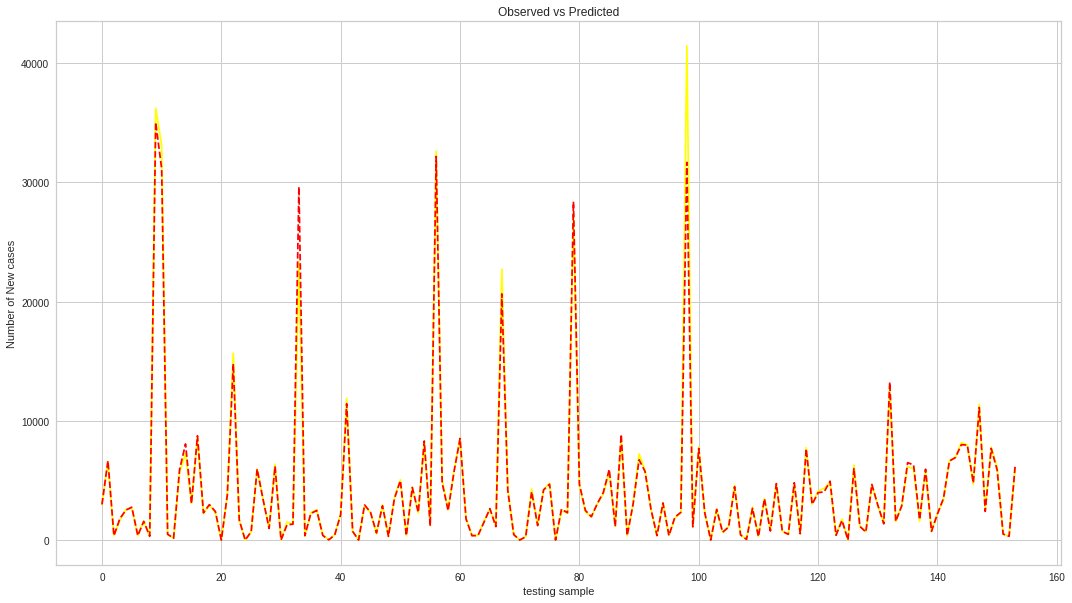

In [138]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18,10]
x_ax=range(len(X_test_CAN_avg))

#plot
plt.plot(x_ax,y_test_CAN_avg, label='observed',color='yellow', linestyle='-')
plt.plot(x_ax,y_test_pred_Canada_avg, label='Predicted',color='red' ,linestyle='--')
plt.ylabel('Number of New cases')
plt.xlabel('testing sample')
plt.title("Observed vs Predicted")
#plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol=2, frameon = False)

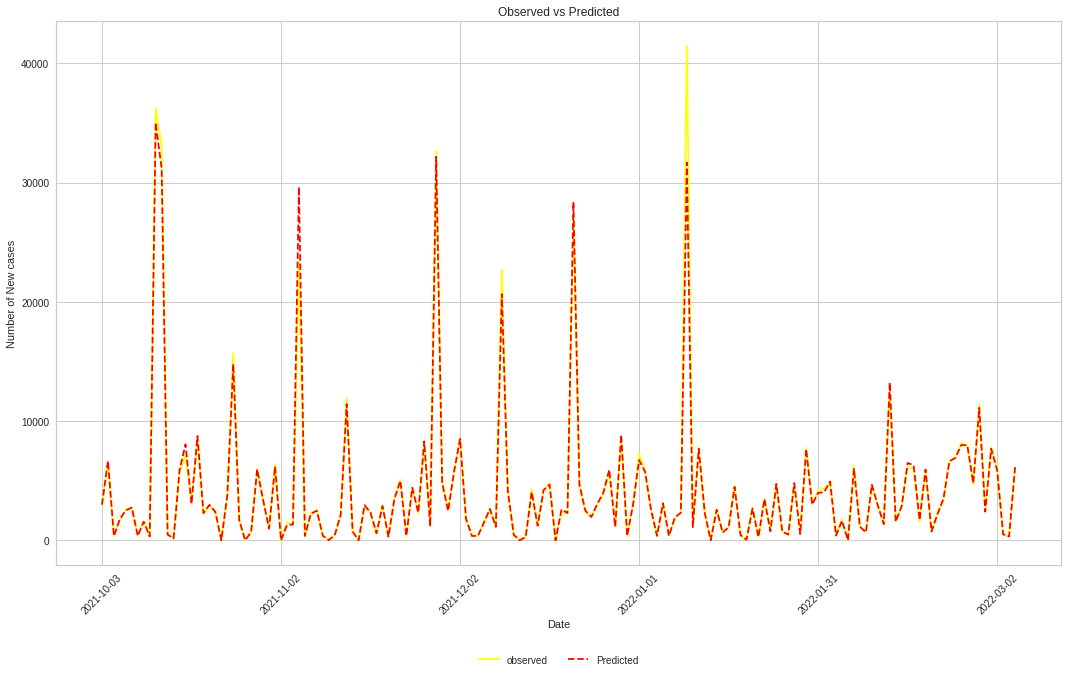

In [150]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18,10]
x_ax = range(len(X_test_CAN_avg))

# set x-axis labels as dates with 6-month interval
x_labels = [d.strftime('%Y-%m-%d') for i, d in enumerate(df2.index[-len(X_test_CAN_avg)::30])] 
plt.xticks(x_ax[::30], x_labels, rotation=45) 

# plot
plt.plot(x_ax, y_test_CAN_avg, label='observed', color='yellow', linestyle='-')
plt.plot(x_ax, y_test_pred_Canada_avg, label='Predicted', color='red', linestyle='--')
plt.ylabel('Number of New cases')
plt.xlabel('Date')
plt.title("Observed vs Predicted")
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)


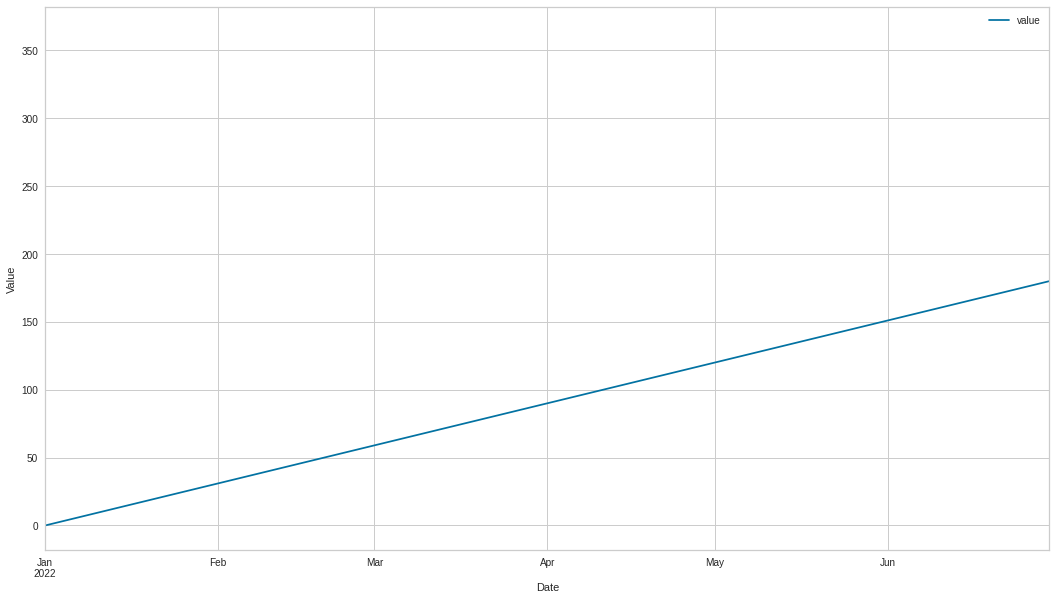

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample DataFrame with dates
dates = pd.date_range(start='2022-01-01', periods=365)
data = pd.DataFrame({'value': range(365)}, index=dates)

# plot the data
fig, ax = plt.subplots()
data.plot(ax=ax)
ax.set_ylabel('Value')
ax.set_xlabel('Date')

# set the x-axis limit to show a date range
ax.set_xlim(['2022-01-01', '2022-06-30'])

plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


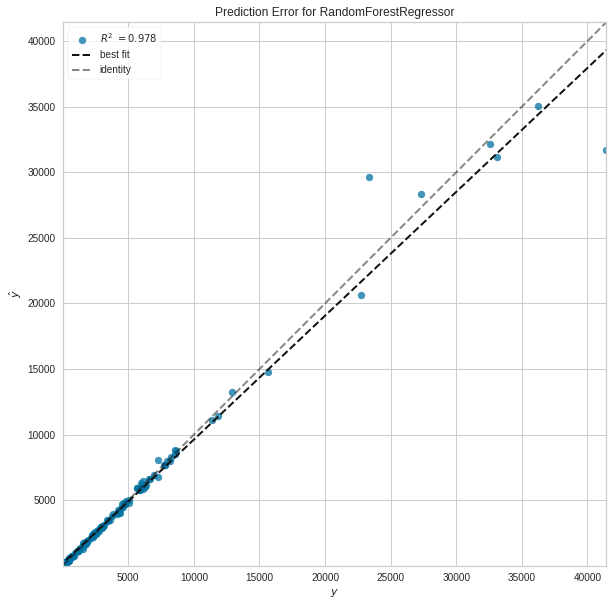

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [122]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(fit_model)
visualizer.fit(X_train_CAN_avg, y_train_CAN_avg)
visualizer.score(X_test_CAN_avg,y_test_CAN_avg)
visualizer.poof()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


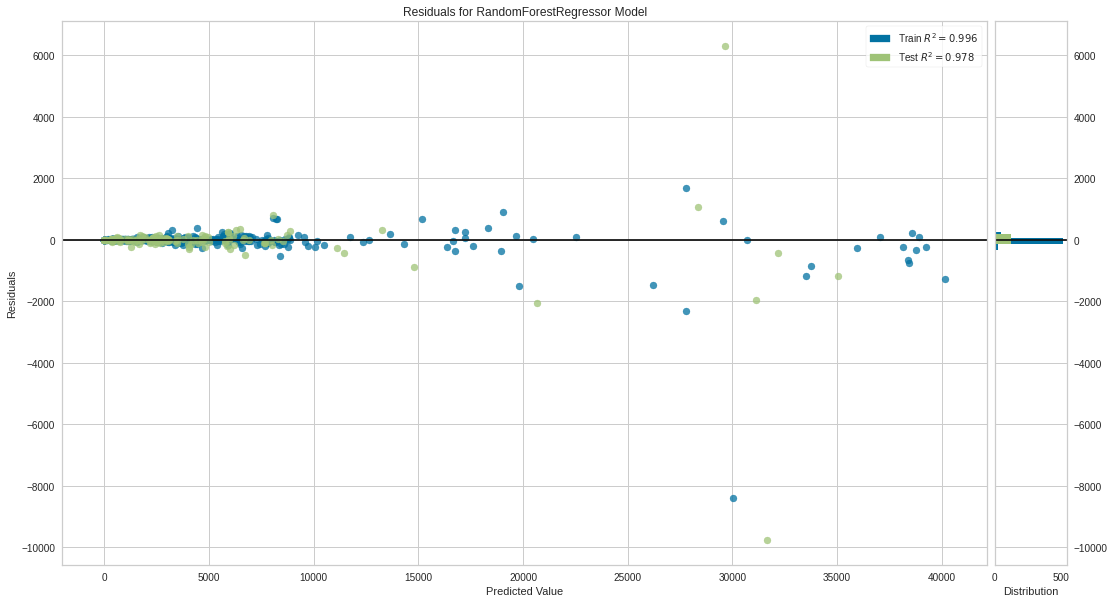

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [123]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(fit_model)
visualizer.fit(X_train_CAN_avg, y_train_CAN_avg)
visualizer.score(X_test_CAN_avg,y_test_CAN_avg)
visualizer.poof()

In [124]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Generate some example data
X_avg = X_train_CAN_avg
y_avg = y_train_CAN_avg

# Define the number of folds
k = 2

# Define the model to be used
model = RandomForestRegressor(n_estimators=100)

# Define the cross-validation method
kf = KFold(n_splits=k)

# Perform k-fold cross-validation
scores = cross_val_score(model, X_avg, y_avg, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

Cross-validation scores: [0.90451212 0.98870456]


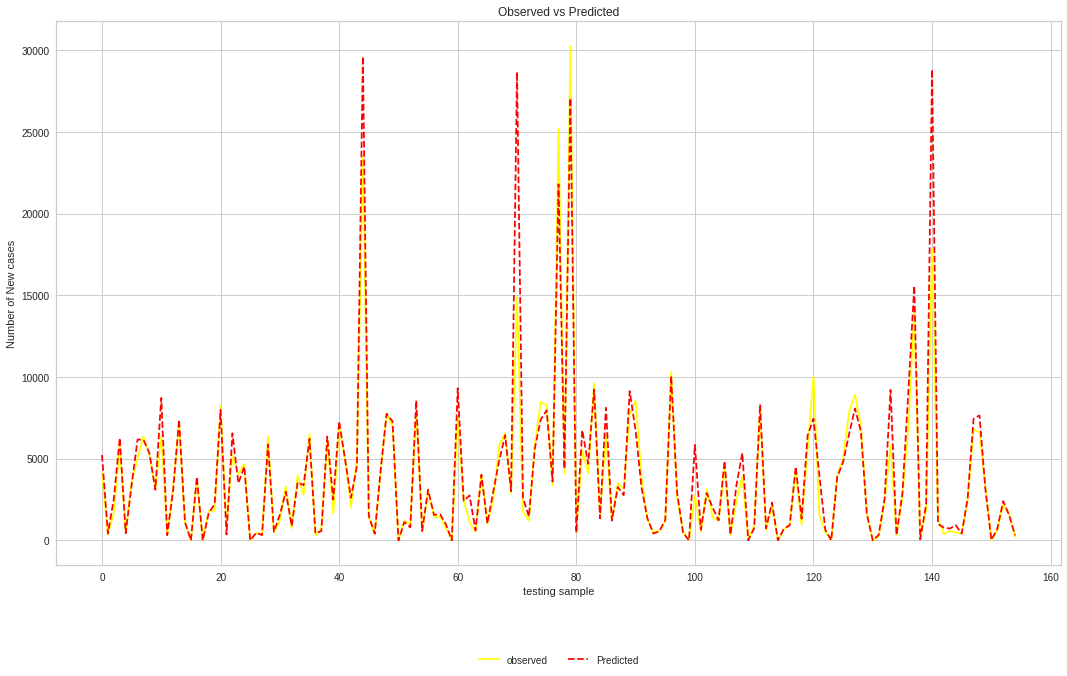

In [125]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18,10]
x_ax=range(len(X_test_CAN))

#plot
plt.plot(x_ax,y_test_CAN, label='observed',color='yellow', linestyle='-')
plt.plot(x_ax,y_test_pred_Canada, label='Predicted',color='red' ,linestyle='--')
plt.ylabel('Number of New cases')
plt.xlabel('testing sample')
plt.title("Observed vs Predicted")
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol=2, frameon = False)

Text(0.5, 1.0, 'Observed vs Predicted')

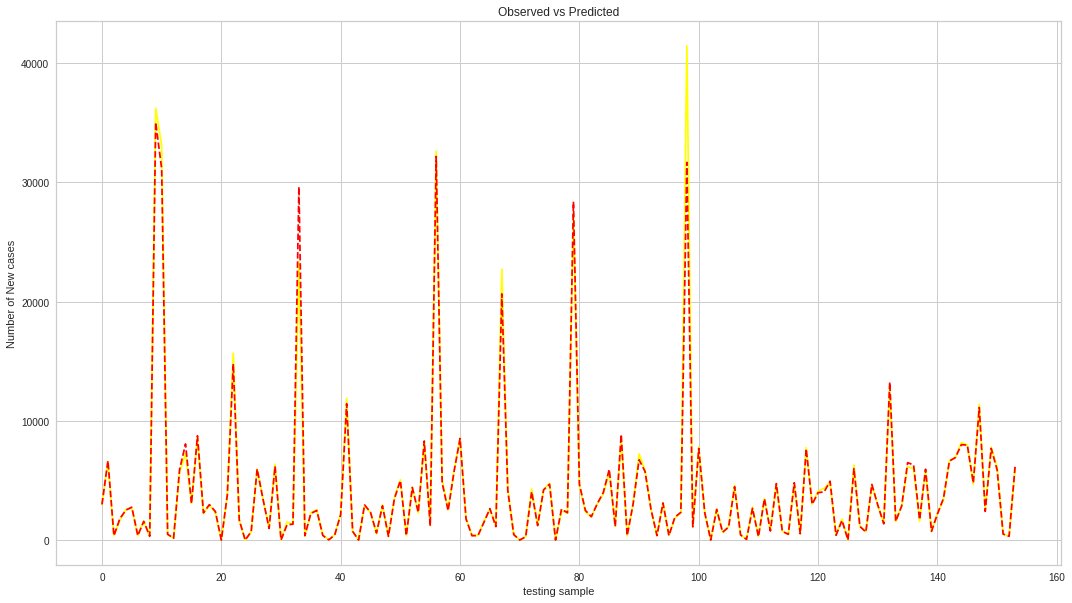

In [126]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18,10]
x_ax=range(len(X_test_CAN_avg))

#plot
plt.plot(x_ax,y_test_CAN_avg, label='observed',color='yellow', linestyle='-')
plt.plot(x_ax,y_test_pred_Canada_avg, label='Predicted',color='red' ,linestyle='--')
plt.ylabel('Number of New cases')
plt.xlabel('testing sample')
plt.title("Observed vs Predicted")
#plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol=2, frameon = False)

In [127]:
X_test_CAN = X_test_CAN[:int(len(X_test_CAN)-2)]

In [128]:
y_test_CAN = y_test_CAN[:int(len(y_test_CAN)-2)]

In [129]:
y_test_pred_Canada = y_test_pred_Canada[:int(len(y_test_pred_Canada)-2)]

In [130]:
print("Accuracy =", r2_score(y_train_CAN, y_train_pred_Canada))

Accuracy = 0.9835218366533924
